# Data Vizualization Steps

## 0 Package + Data Imports

In [1]:
# Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Loading csvs
products_df = pd.read_csv("data_clean/products_cl.csv")
orderlines_df = pd.read_csv("data_clean/orderlines_cl.csv")
orders_df = pd.read_csv("data_clean/orders_cl.csv")
brands_df = pd.read_csv("data_clean/brands_cl.csv")

# 1 Preparation for Data Vizualization

## 1.1 Checking Data Type and Completeness

In [72]:
# Displaying structure of the dfs
products_df.head(5)

,sku,name,desc,listed_price,in_stock,type,man,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Accessories & Peripherals
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,Accessories & Peripherals
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,Accessories & Peripherals
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,Accessories & Peripherals
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,Storage Devices


In [73]:
products_df.nunique()

sku             5061
name            5021
desc            3752
listed_price    1020
in_stock           2
type             114
man              195
category          16
dtype: int64

In [74]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           5061 non-null   object 
 1   name          5061 non-null   object 
 2   desc          5061 non-null   object 
 3   listed_price  5061 non-null   float64
 4   in_stock      5061 non-null   int64  
 5   type          5061 non-null   int64  
 6   man           5061 non-null   object 
 7   category      5061 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 316.4+ KB


In [63]:
orderlines_df.sample(10)

,id,order_id,qty,sku,unit_price,date,man,listed_price,discount_pct,discount_raw
79576,1596208,504349,5,DLL0037,245.99,2018-02-02 12:12:13,DLL,292.99,16.04,47.00
3137,1140389,307012,1,APP1194,35.00,2017-01-11 06:01:25,APP,29.95,33.26,-5.05
66103,1513347,470672,1,APP2012,39.90,2017-12-24 12:33:58,APP,45.00,11.33,5.10
22211,1273894,368451,1,OWC0024,25.99,2017-06-23 17:19:07,OWC,35.99,27.79,10.00
2744,1138179,306107,1,WAC0149,14.49,2017-01-09 22:13:05,WAC,29.99,51.68,15.50
16175,1233974,347667,2,WDT0249,239.99,2017-04-24 00:15:27,WDT,120.99,17.36,-119.00
31923,1315562,388293,2,ELG0039,39.00,2017-08-10 14:18:44,ELG,49.95,21.92,10.95
72534,1547774,485889,1,LGE0057,945.99,2018-01-08 20:29:59,LGE,59.99,16.67,-886.00
73104,1552539,487668,1,IFX0181,69.99,2018-01-10 12:41:00,IFX,89.95,22.19,19.96
6422,1153835,312607,1,MOS0086,14.99,2017-01-20 17:02:09,MOS,109.95,27.25,94.96


In [75]:
# Converting datetime format
orderlines_df["date"] = pd.to_datetime(orderlines_df["date"])
orderlines_df.nunique()

id              52474
order_id        40482
qty                27
sku              5061
unit_price       4264
date            52097
listed_price     1020
discount_pct     4060
discount_raw     3970
man               195
dtype: int64

In [76]:
orders_df.head()

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed


In [77]:
# Converting datetime format
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40974 entries, 0 to 40973
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40974 non-null  int64         
 1   created_date  40974 non-null  datetime64[ns]
 2   total_paid    40974 non-null  float64       
 3   state         40974 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
brands_df.head(1)

,short,long
0,8MO,8Mobility


In [78]:
# Renaming short into man for easier merging
brands_df.rename(columns = {'short': 'man'}, inplace = True)

# Renaming long into brand for more intuitive understanding
brands_df.rename(columns = {'long': 'brand'}, inplace = True)

## 1.2 Performing merges
This serves as a preparation for aggregation and vizulization

In [79]:
# Creating a orderlines copy and merging it with the category entry from products
ol_prod_df = pd.merge(orderlines_df, products_df[['sku', 'name', 'category']], on = 'sku', how = 'left')

In [80]:
ol_prod_df.head(1)

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw,man,name,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,22.13,13.5,OWC,OWC In-line Digital Temperature Sensor Kit HDD...,Miscellaneous


In [81]:
#adding brands column to the table
ol_prod_brand_df = pd.merge(ol_prod_df, brands_df[['man', 'brand']], on = 'man', how = 'left')

In [85]:
ol_prod_brand_df.sample(10)

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw,man,name,category,brand
24851,1379544,413271,2,LAC0212,123.80,2017-10-16 19:10:11,139.99,11.57,16.19,LAC,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,Storage Devices,LaCie
42194,1535383,480986,1,JBL0097,24.99,2018-01-03 15:01:21,29.99,16.67,5.00,JBL,JBL GO Bluetooth Speaker Blue,Audio & Sound,JBL
31323,1436394,438761,2,APP0698,8.99,2017-11-24 12:24:21,25.00,64.04,16.01,APP,Apple Lightning Cable Connector to USB 1m Whit...,Accessories & Peripherals,Apple
45830,1579444,498075,1,XDO0049,25.99,2018-01-24 23:39:48,32.99,21.22,7.00,XDO,X-Doria Defense Shield iPhone Case 8 Plus / 7 ...,Cases & Protectors,X-Doria
11309,1246897,355345,1,ZAG0028,59.99,2017-05-12 20:42:21,69.99,14.29,10.00,ZAG,Zagg keyboard Messenger Case iPad Air / Air 2 ...,Tablets & E-Readers,ZaggKeys
33255,1451106,445168,1,PAC0516,161.89,2017-11-26 13:14:16,201.98,19.85,40.09,PAC,Synology DS115j Pack | Seagate 2TB IronWolf,Storage Devices,Pack
945,1130896,303004,1,JAW0040,49.99,2017-01-05 09:57:33,179.99,72.23,130.00,JAW,Jawbone UP3 Activity Monitor Black,Accessories & Peripherals,Jawbone
38375,1506541,467469,1,JBL0107,79.99,2017-12-20 02:42:34,129.99,38.46,50.00,JBL,JBL Flip 3 Bluetooth Speaker Black,Audio & Sound,JBL
46579,1589282,501771,1,APP0663,192.00,2018-01-30 10:16:34,249.00,22.89,57.00,APP,AppleCare Protection Plan MacBook / Air / Pro ...,Miscellaneous,Apple
36093,1483762,457938,1,LAC0233,177.80,2017-12-09 00:13:33,199.99,11.10,22.19,LAC,LaCie Porsche Design Desktop Drive 6TB USB 3.0...,Storage Devices,LaCie


In [83]:
# Merging orders column total paid into the table
ol_xt_df = pd.merge(ol_prod_brand_df, orders_df[['order_id', 'total_paid']], on = 'order_id', how = 'left')

In [86]:
ol_xt_df.shape

(52478, 14)

In [87]:
ol_xt_df.nunique()

id              52474
order_id        40482
qty                27
sku              5061
unit_price       4264
date            52097
listed_price     1020
discount_pct     4060
discount_raw     3970
man               195
name             5021
category           16
brand             176
total_paid       9796
dtype: int64

In [88]:
ol_xt_df['category'].isna().value_counts()

category
False    52478
Name: count, dtype: int64

In [89]:
#Filtering out rows that have no entry for category
ol_xt_df = ol_xt_df.loc[~ol_xt_df['category'].isna(),:]

In [90]:
# export extended orderlines dataframe
ol_xt_df.to_csv("data_clean/orderlines_xt.csv", index=False)

## 2 Evaluation
First data is being aggregated and sorted by most popular product categories

### 2.1 Aggregation

In [92]:
# Imports directly after the final cleaning touches
ol_xt_df = pd.read_csv('data_clean/orderlines_xt.csv')

In [93]:
ol_xt_df.head()

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw,man,name,category,brand,total_paid
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,22.13,13.50,OWC,OWC In-line Digital Temperature Sensor Kit HDD...,Miscellaneous,OWC,51.48
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,17.25,3.96,IOT,iOttie Easy View 2 Car Black Support,Accessories & Peripherals,iOttie,18.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00,18.89,16.81,APP,Apple 85W MagSafe 2 charger MacBook Pro screen...,Power & Batteries,Apple,72.19
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,20.90,16.09,CRU,(Open) Crucial 240GB SSD 7mm BX200,Open & Second Hand - Misc,Crucial,65.89
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,52.50,157.50,PEB,Pebble Smartwatch Time Steel Black,Accessories & Peripherals,Pebble,154.48


In [103]:
# Convert date column to datetime
ol_xt_df['date'] = pd.to_datetime(ol_xt_df['date'])

In [94]:
# Creating dfs for top - n sold items and top - n revenue
top_cat_count_df = (
                    ol_xt_df.groupby("category", as_index=False)
                    ["qty"].sum()
                    .nlargest(10, "qty")
                    )
top_cat_count_df.rename(columns = {'qty': 'total_units'}, inplace = True)
top_cat_count_df

,category,total_units
14,Storage Devices,17294
0,Accessories & Peripherals,12691
4,Cases & Protectors,7539
15,Tablets & E-Readers,3496
1,Audio & Sound,3460
6,Miscellaneous,3298
11,Power & Batteries,2381
7,Mobile Phones & Accessories,1856
12,Repair & Maintenance,1665
8,Monitors & Display,1601


In [95]:
# calculating the real total item paid price multiplying quantity and unit_price
# total_paid from orders is just for the whole order_id. not to be used for revenue
ol_xt_df["order_product_price"] = ol_xt_df["qty"] * ol_xt_df["unit_price"]
ol_xt_df.sample(20)

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw,man,name,category,brand,total_paid,order_product_price
25279,1382948,414823,1,ZAG0030,19.99,2017-10-20 10:30:19,79.99,75.01,60.00,ZAG,Zagg Folio Case Color Keyboard Folio iPad Air ...,Tablets & E-Readers,ZaggKeys,33.97,19.99
1796,1138214,306122,1,SPE0143,36.99,2017-01-09 22:32:41,49.90,25.87,12.91,SPE,"SmartShell Speck Case Macbook Air 11 ""Hot Lips...",Cases & Protectors,Spek SeeThru,91.96,36.99
34273,1458677,448517,1,APP2485,881.05,2017-11-27 15:27:07,919.00,4.13,37.95,APP,Apple iPhone 8 Plus 64GB Gold,Miscellaneous,Apple,881.05,881.05
18606,1312216,386659,1,WAC0246,79.99,2017-08-06 14:11:27,89.90,11.02,9.91,WAC,Wacom Bamboo Pen Sketch iPad / iPhone Black,Tablets & E-Readers,Wacom,86.98,79.99
42735,1543388,484149,1,SAN0143,13.99,2018-01-07 12:12:07,15.99,12.51,2.00,SAN,Sandisk Ultra 32GB USB Pen-Drive-C,Storage Devices,SanDisk,33.97,13.99
42908,1545796,485061,1,SAT0070,32.99,2018-01-08 08:58:47,34.99,5.72,2.00,SAT,Satechi USB adapter to HDMI 4K-C 60Hz Plata,Accessories & Peripherals,Satechi,37.98,32.99
23311,1366227,406735,1,APP1645,627.33,2017-09-30 18:30:42,639.00,1.83,11.67,APP,Apple iPhone 7 32GB Silver,Miscellaneous,Apple,627.33,627.33
1366,1134818,304695,1,APP0703,49.58,2017-01-08 11:37:23,89.00,44.29,39.42,APP,"85W MagSafe charger Apple MacBook Pro 15 ""/ 17...",Power & Batteries,Apple,56.57,49.58
13180,1267993,365560,1,ELA0019,19.99,2017-06-14 12:59:53,24.95,19.88,4.96,ELA,Elago W3 Support Stand Vintage Apple Watch Black,Smartwatches & Accessories,Elago,43.97,19.99
9332,1231027,347599,1,HOC0010,29.99,2017-04-19 23:06:01,45.00,33.36,15.01,HOC,Nike hoco Series Apple Watch Strap 42mm Black ...,Smartwatches & Accessories,Hoco Nike,65.98,29.99


In [96]:
# Creating similar dataframe for revenue numbers
top_cat_revenue_df = (
                     ol_xt_df.groupby("category", as_index=False)
                     ["order_product_price"].sum()
                     .nlargest(10, "order_product_price")
                     )
top_cat_revenue_df.rename(columns = {'order_product_price': 'revenue'}, inplace = True)
top_cat_revenue_df

,category,revenue
14,Storage Devices,2704887.49
6,Miscellaneous,887417.35
15,Tablets & E-Readers,687432.03
0,Accessories & Peripherals,636178.12
8,Monitors & Display,615532.13
7,Mobile Phones & Accessories,467322.33
1,Audio & Sound,405780.90
10,Open & Second Hand - Misc,285871.25
13,Smartwatches & Accessories,237528.64
4,Cases & Protectors,214241.26


In [97]:
# Creating a partial dataframe snapshot where only top10 revenue categories remain
top_cat_test_df = ol_xt_df.loc[ol_xt_df['category'].isin(top_cat_revenue_df['category']),:]
top_cat_test_df.head(1)

,id,order_id,qty,sku,unit_price,date,listed_price,discount_pct,discount_raw,man,name,category,brand,total_paid,order_product_price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,22.13,13.5,OWC,OWC In-line Digital Temperature Sensor Kit HDD...,Miscellaneous,OWC,51.48,47.49


### 3.2 Static vizualizations

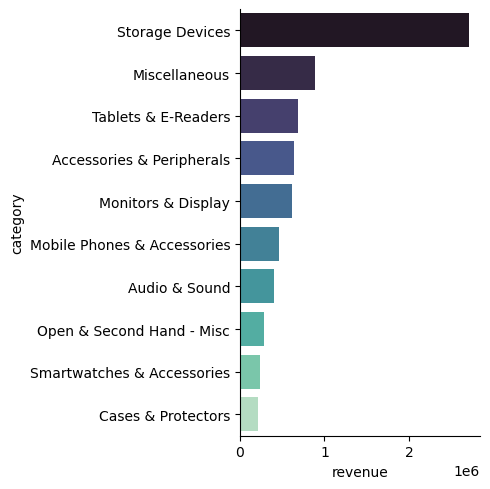

In [98]:
# Creating an overview of top10 revenue and sold items
sns.catplot(data=top_cat_revenue_df,
            kind='bar',
            y="category",
            x="revenue",
            palette="mako",
            );

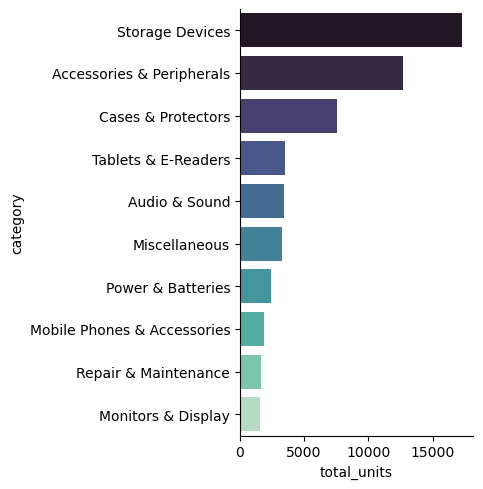

In [99]:
sns.catplot(data=top_cat_count_df,
            kind='bar',
            y="category",
            x="total_units",
            palette="mako",
            );

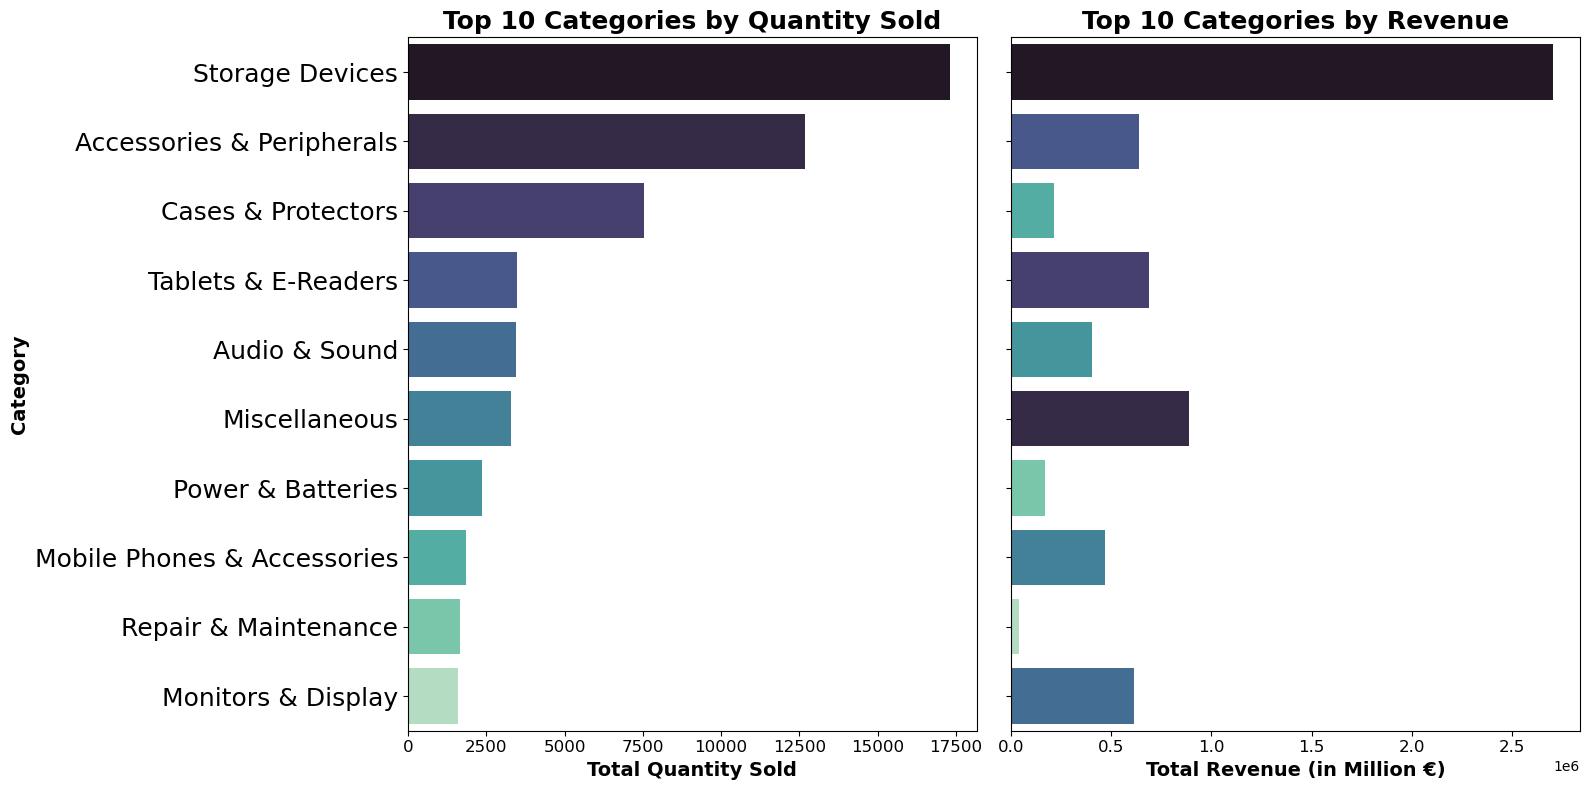

In [100]:
# Combining them in one joint graphic

# Aggregate data by category
category_stats = ol_xt_df.groupby('category').agg({'qty': 'sum', 'order_product_price': 'sum'}).reset_index()

# Get top categories by quantity sold
top_qty_categories = category_stats.sort_values(by='qty', ascending=False).head(10)['category']

# filter the category_stats 
top_categories = category_stats[category_stats['category'].isin(top_qty_categories)]

# setting up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

#font size settings
title_font = {'fontsize': 18, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 12
category_fontsize =18

# bar plot for quantity sold
sns.barplot(data=top_categories.sort_values(by='qty', ascending=False), y='category', x='qty', ax=axes[0], palette='mako')
axes[0].set_xlabel('Total Quantity Sold', **label_font)
axes[0].set_ylabel('Category', **label_font)
axes[0].set_title('Top 10 Categories by Quantity Sold', **title_font)
axes[0].tick_params(axis='both', labelsize=tick_fontsize)

for label in axes[0].get_yticklabels():
    label.set_fontsize(category_fontsize)

# bar plot for revenue
sns.barplot(data=top_categories.sort_values(by='order_product_price', ascending=False), y='category', x='order_product_price', ax=axes[1], palette='mako')
axes[1].set_xlabel('Total Revenue (in Million €)', **label_font)
axes[1].set_ylabel('')  # Remove redundant y-axis label
axes[1].set_title('Top 10 Categories by Revenue', **title_font)
axes[1].tick_params(axis='both', labelsize=tick_fontsize)

# display and save
plt.tight_layout()
plt.savefig("top_qty_revenue", dpi=300)
plt.show()

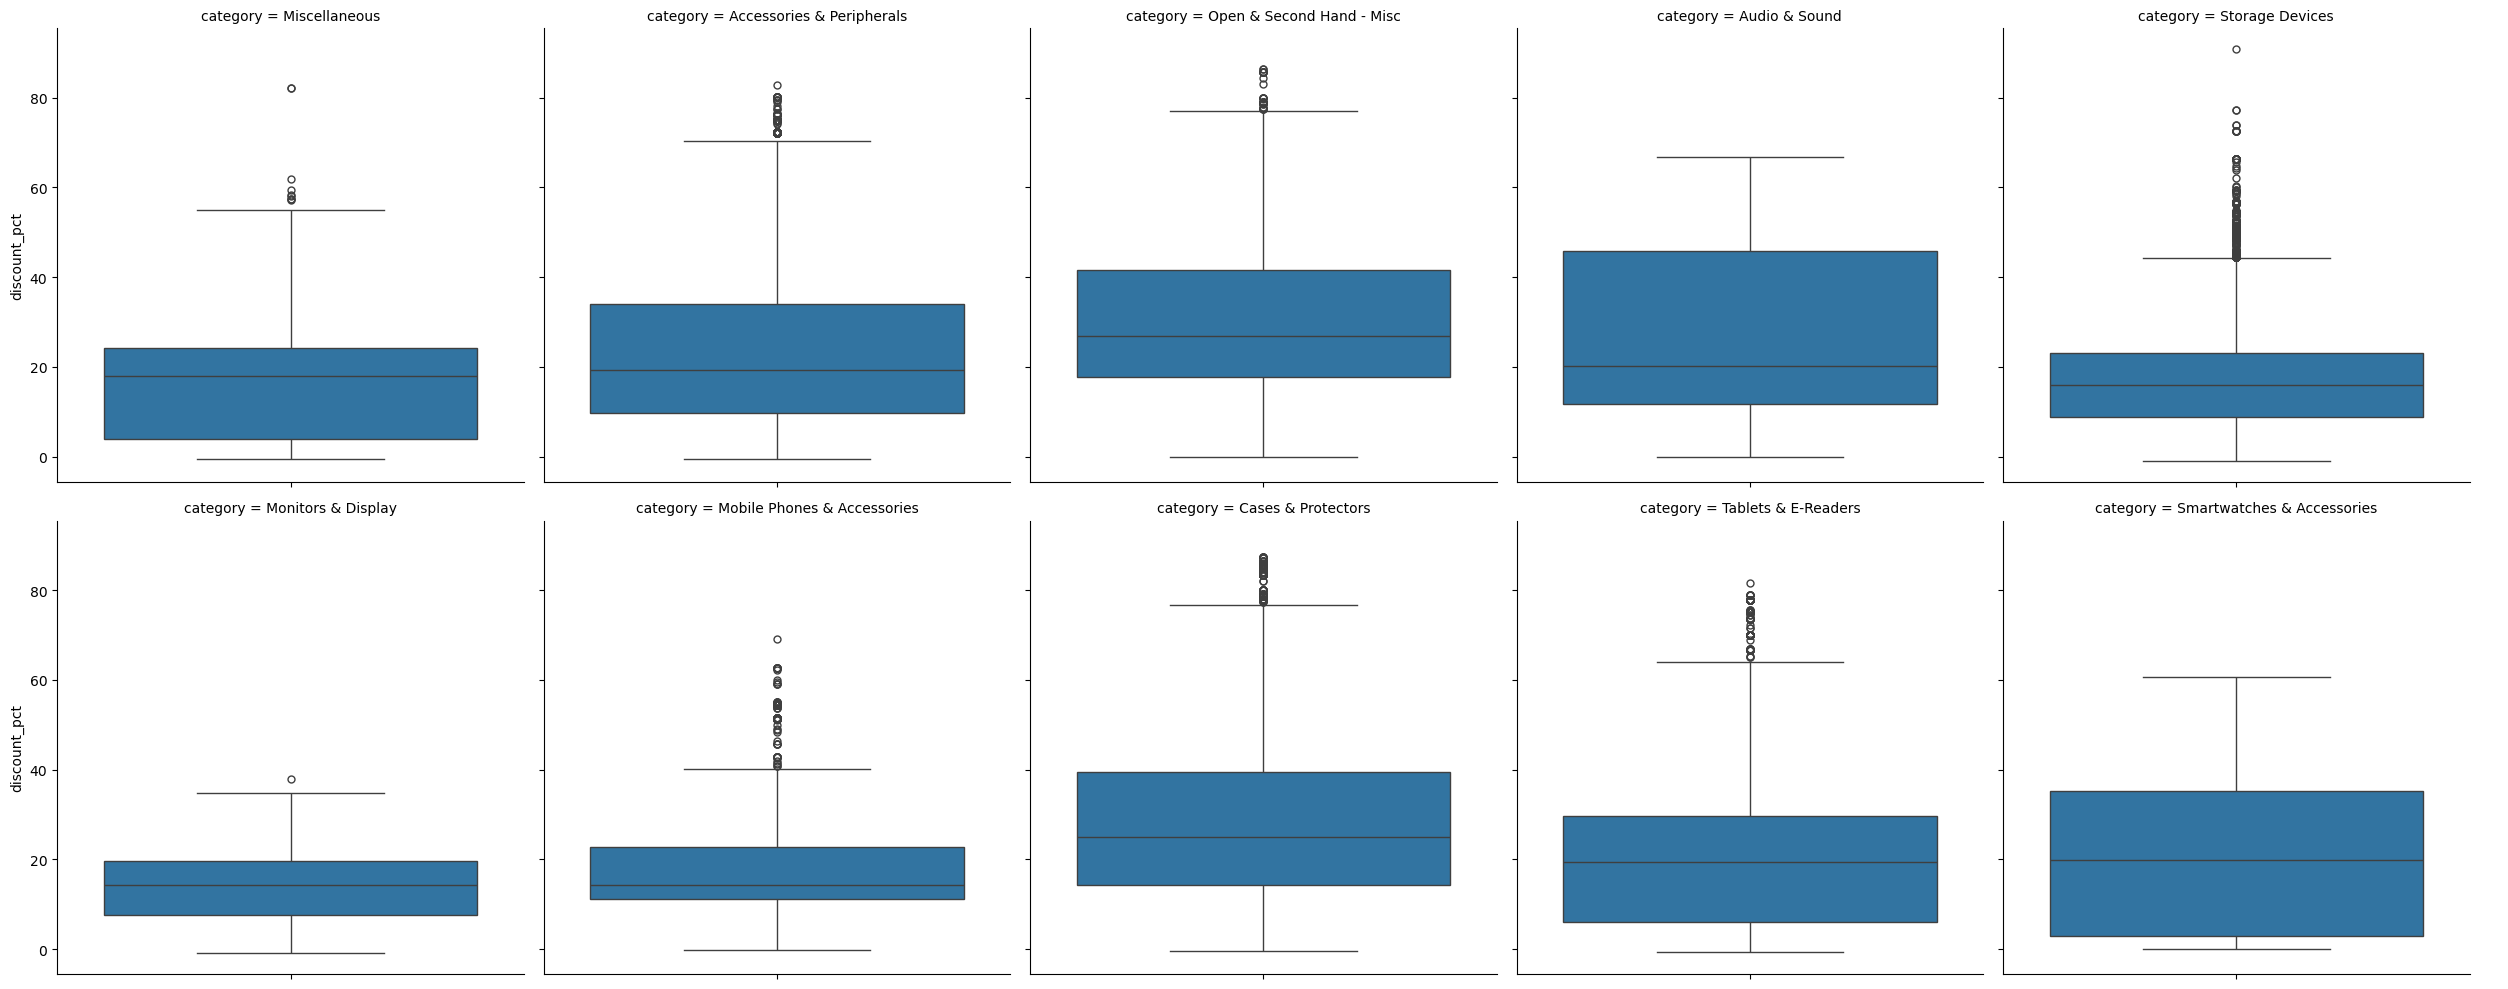

In [101]:
sns.catplot(data=top_cat_test_df,
            kind = 'box',
            y="discount_pct",
            col="category",
            col_wrap=5,
           );

### 3.3 Time-Series Vizualizations
Include both sold units and revenue graphs. Can also be used for other categories outside the top10 that were done here

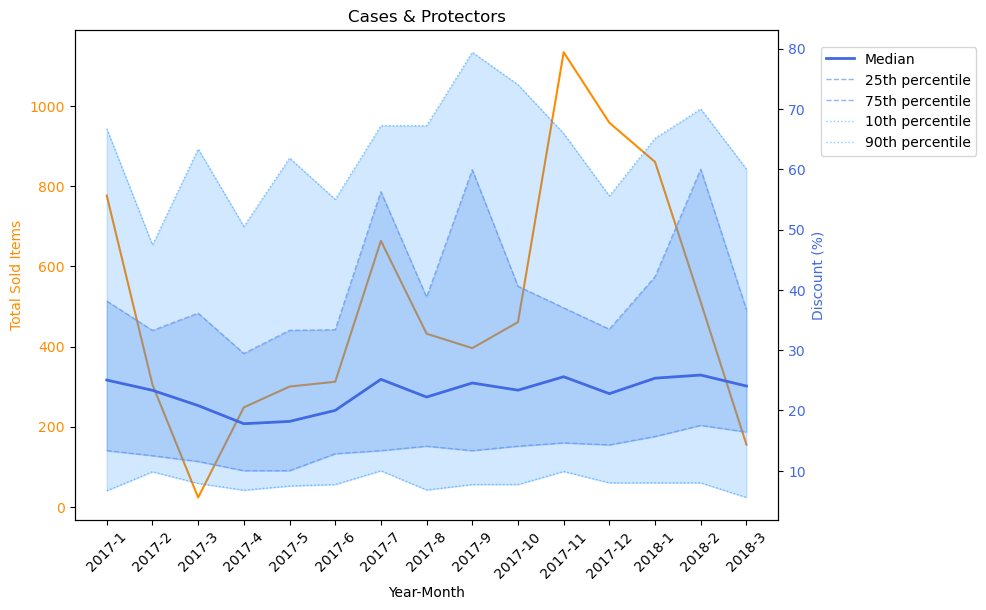

In [104]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Cases & Protectors', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Cases & Protectors')
plt.show();

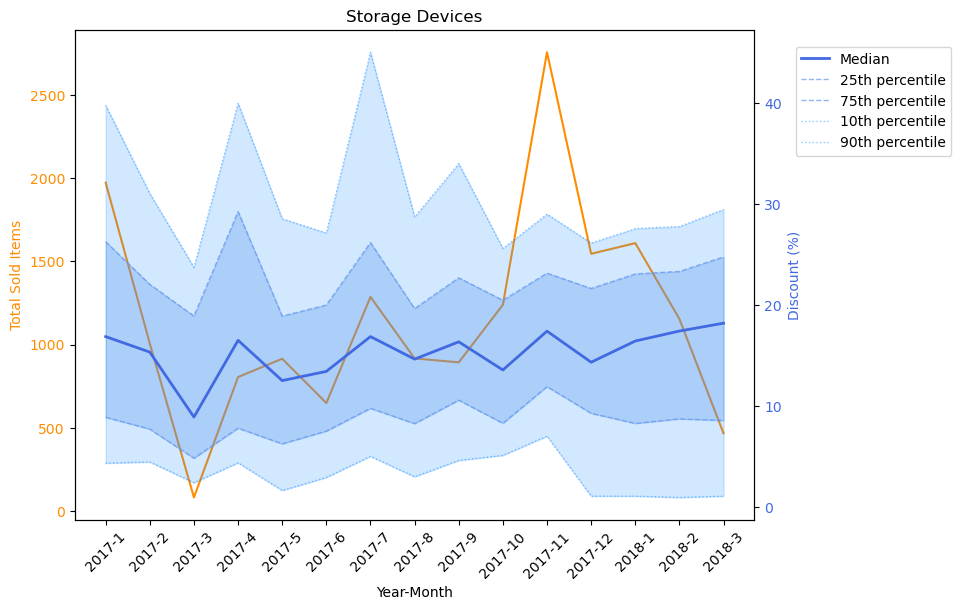

In [105]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Storage Devices', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))

fig.tight_layout()
plt.title('Storage Devices')
plt.show();

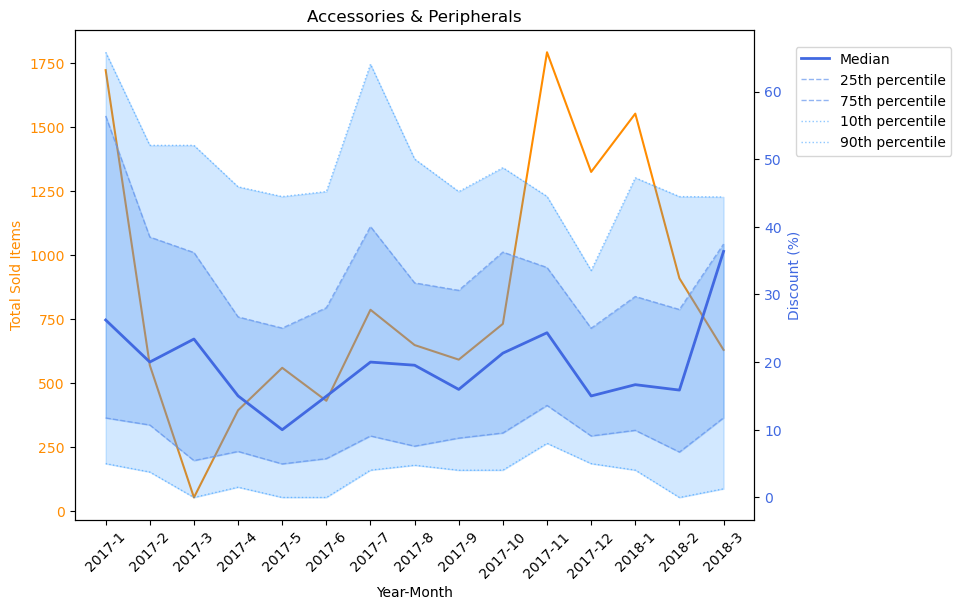

In [106]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Accessories & Peripherals', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Accessories & Peripherals')
plt.show();

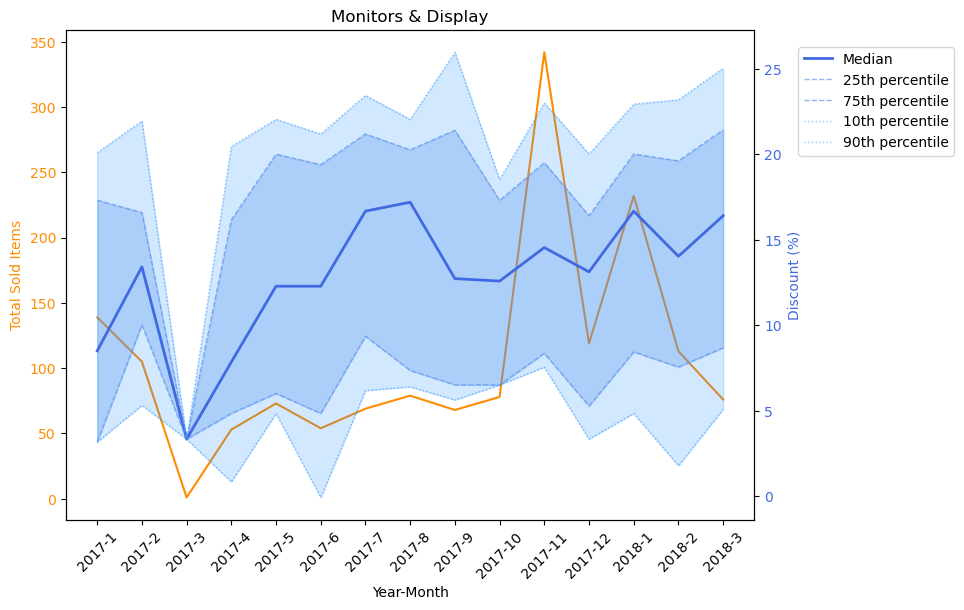

In [108]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Monitors & Display', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Monitors & Display')
plt.show();

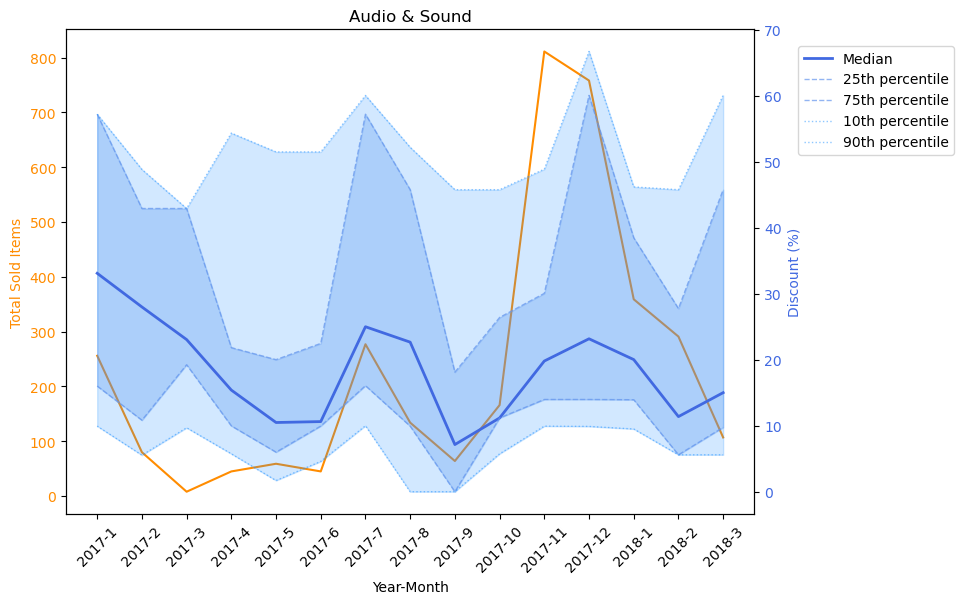

In [109]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Audio & Sound', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Audio & Sound')
plt.show();

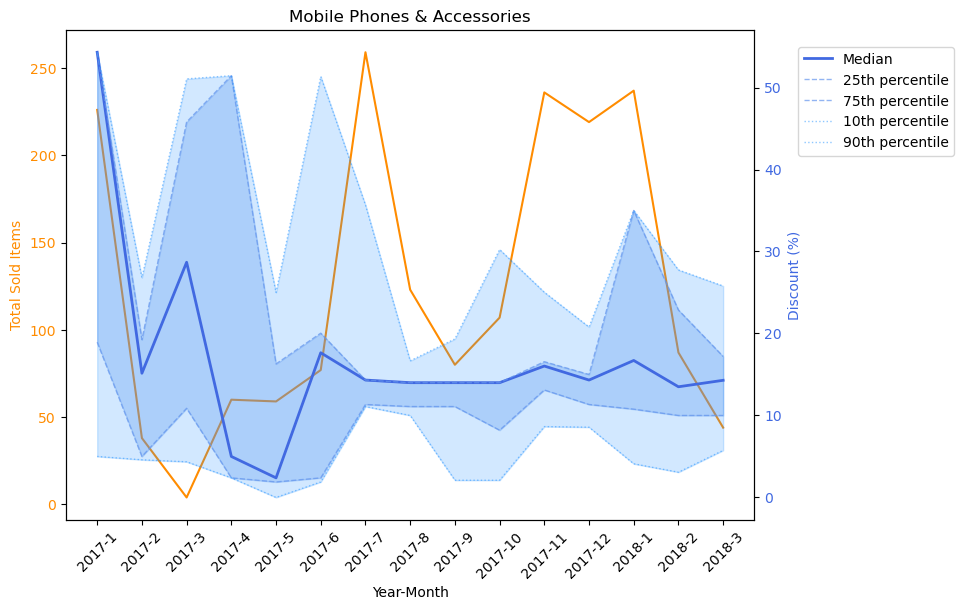

In [110]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Mobile Phones & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Mobile Phones & Accessories')
plt.show();

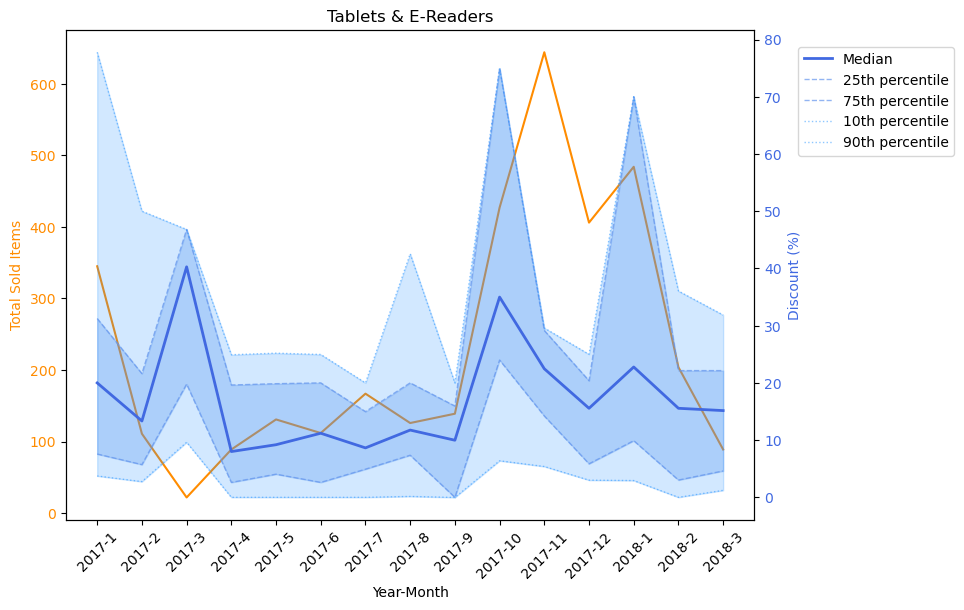

In [111]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Tablets & E-Readers', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Tablets & E-Readers')
plt.show();

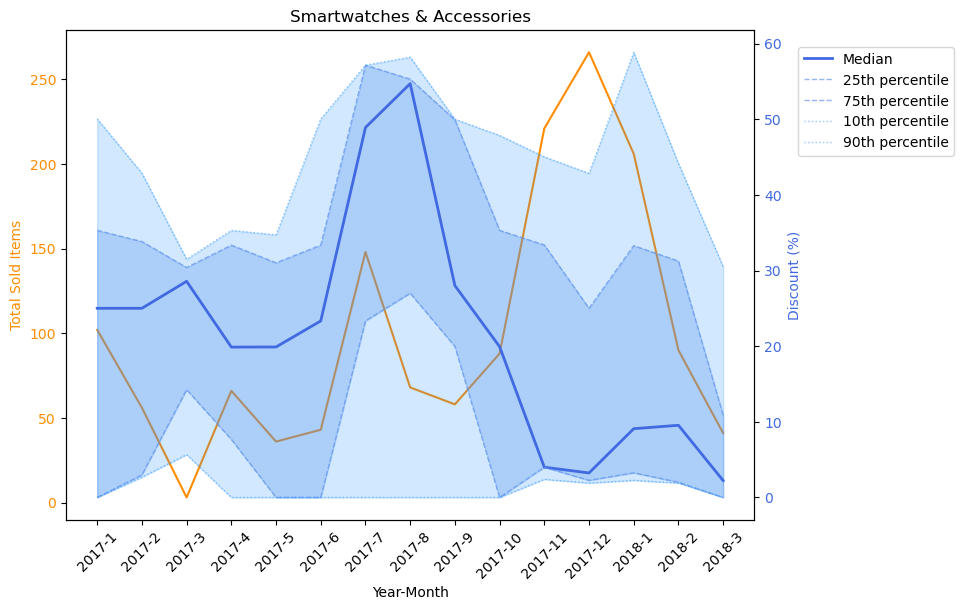

In [112]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Smartwatches & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Smartwatches & Accessories')
plt.show();

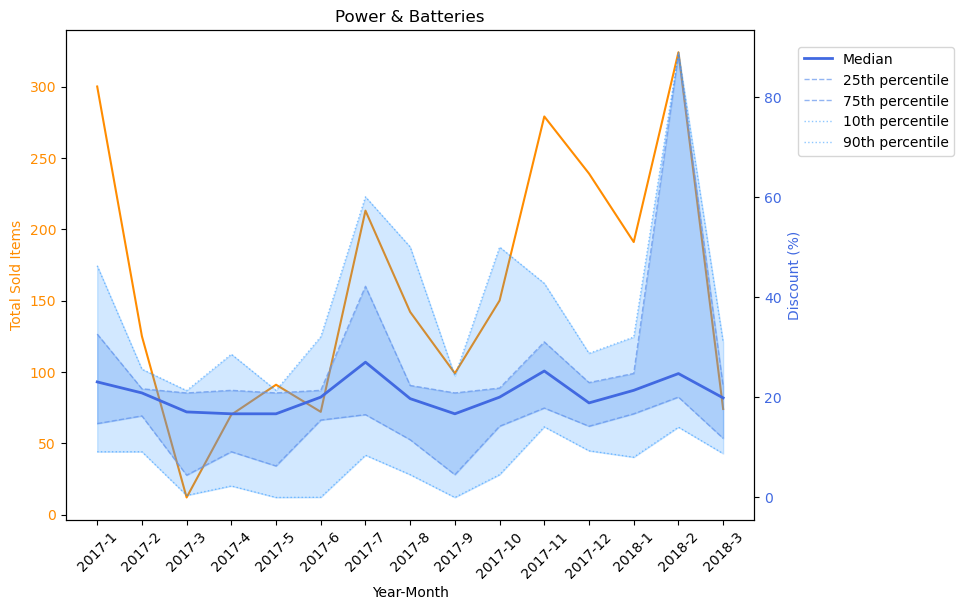

In [113]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Power & Batteries', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Power & Batteries')
plt.show();

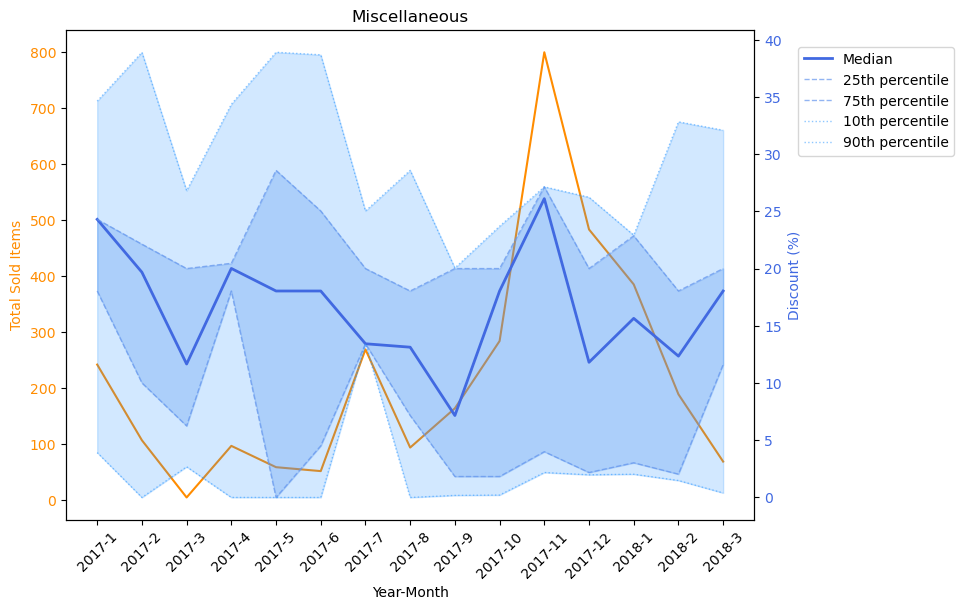

In [117]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Miscellaneous', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'qty': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['qty_monthly', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sold Items', color=color)
sns.lineplot(x=x_labels, y='qty_monthly', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))


fig.tight_layout()
plt.title('Miscellaneous')
plt.show();

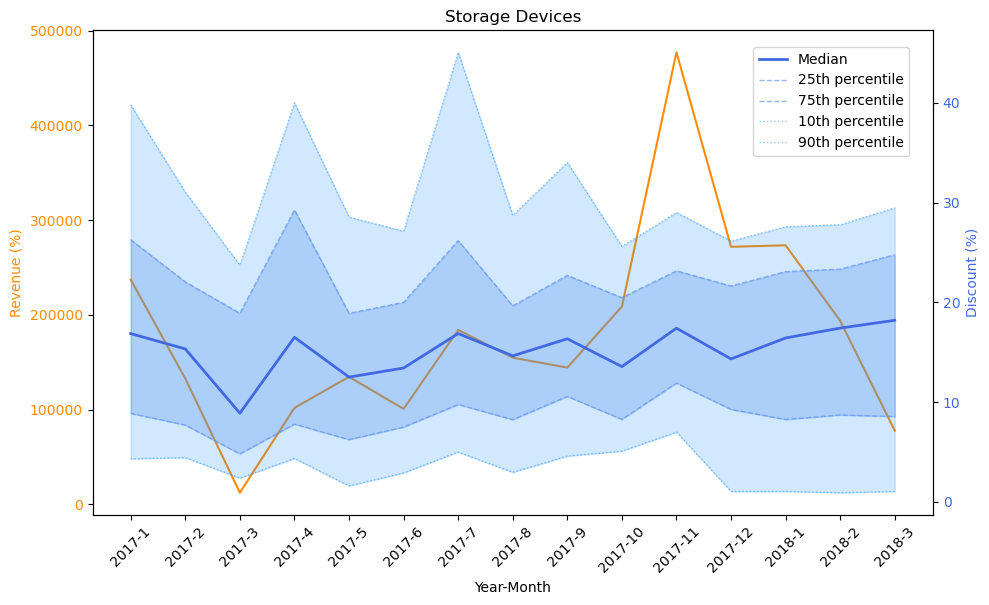

In [118]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Storage Devices', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

# Updated aggregation to include percentiles
temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({
                'order_product_price': 'sum', 
                'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
            })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (%)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))

fig.tight_layout()
plt.title('Storage Devices')
plt.show();

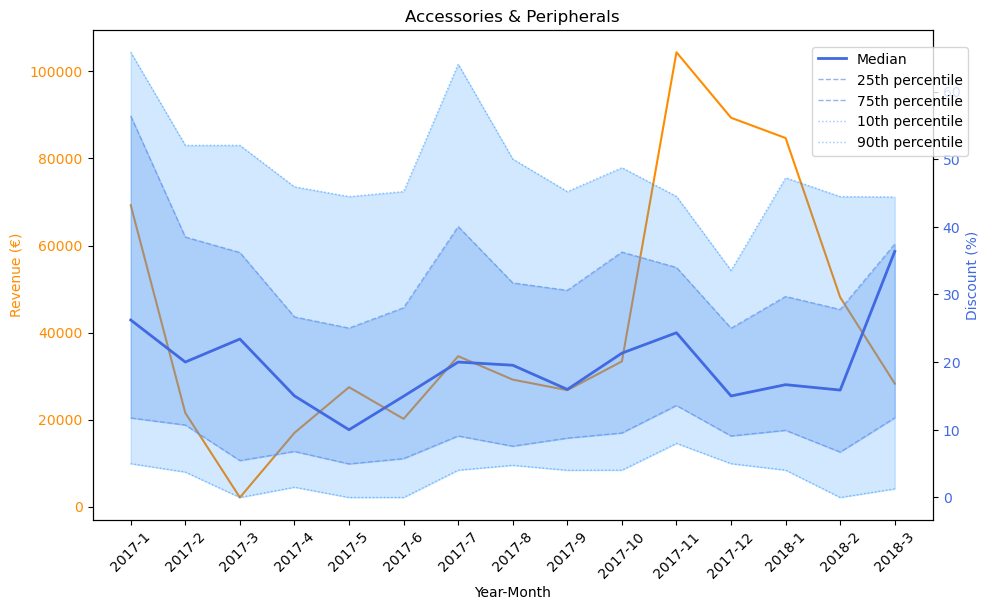

In [119]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Accessories & Peripherals', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Accessories & Peripherals')
plt.show();

# color = 'lightseagreen'
# ax1.set_xlabel('Year-Month')
# ax1.set_ylabel('revenue (€)', color=color)
# sns.lineplot(x=temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str), y='order_product_price', data=temp_agg_df_alt, ax=ax1 , color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.tick_params(axis='x', rotation=45)

# ax2 = ax1.twinx()

# color = 'navy'
# ax2.set_ylabel('discount (%)', color=color)
# sns.lineplot(x=temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str), y='discount_pct', data=temp_agg_df_alt, ax=ax2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Accessories & Peripherals')
# plt.show();

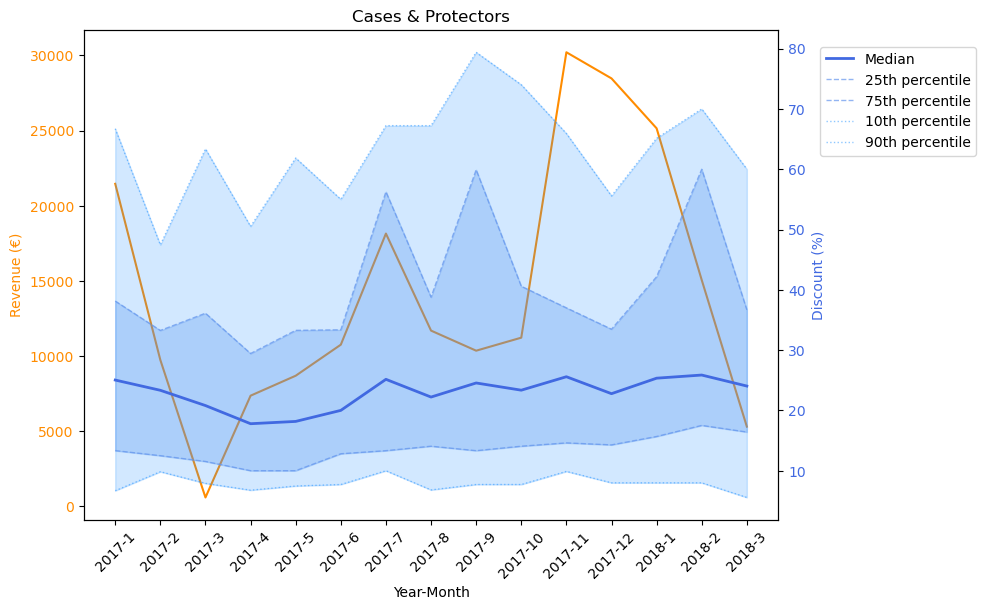

In [120]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Cases & Protectors', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Cases & Protectors')
plt.show();

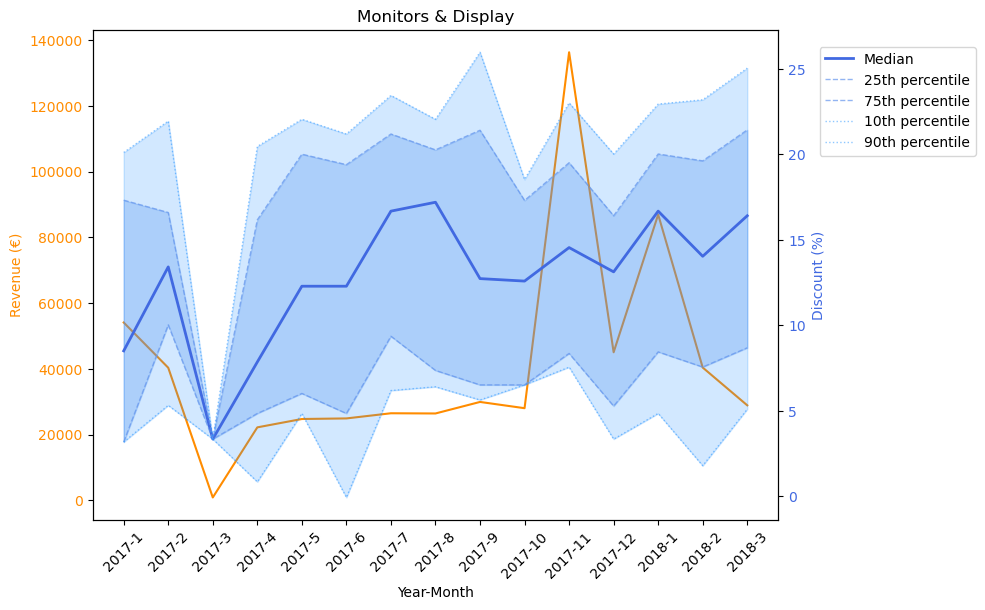

In [121]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Monitors & Display', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Monitors & Display')
plt.show();

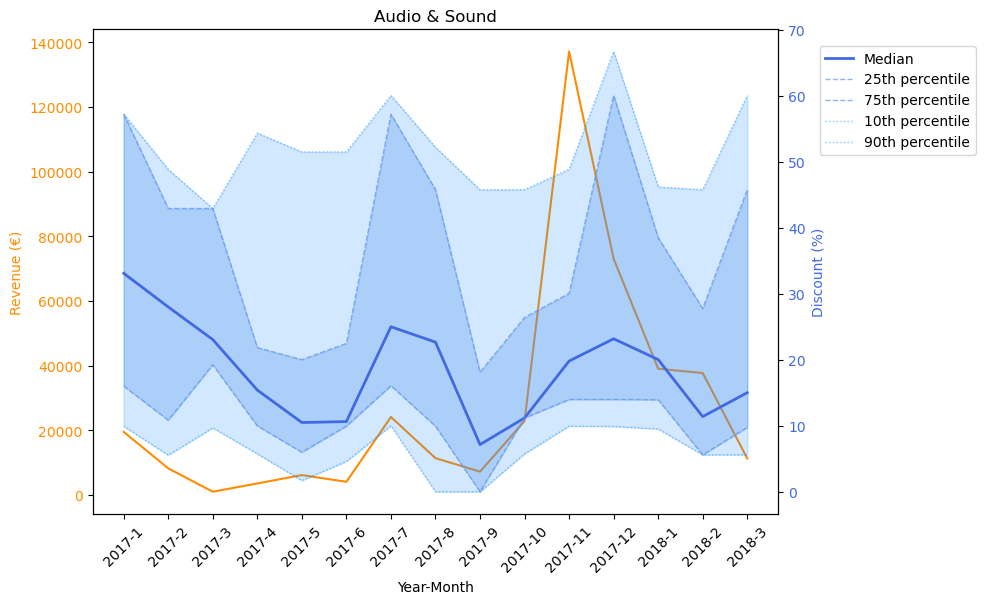

In [122]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Audio & Sound', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Audio & Sound')
plt.show();

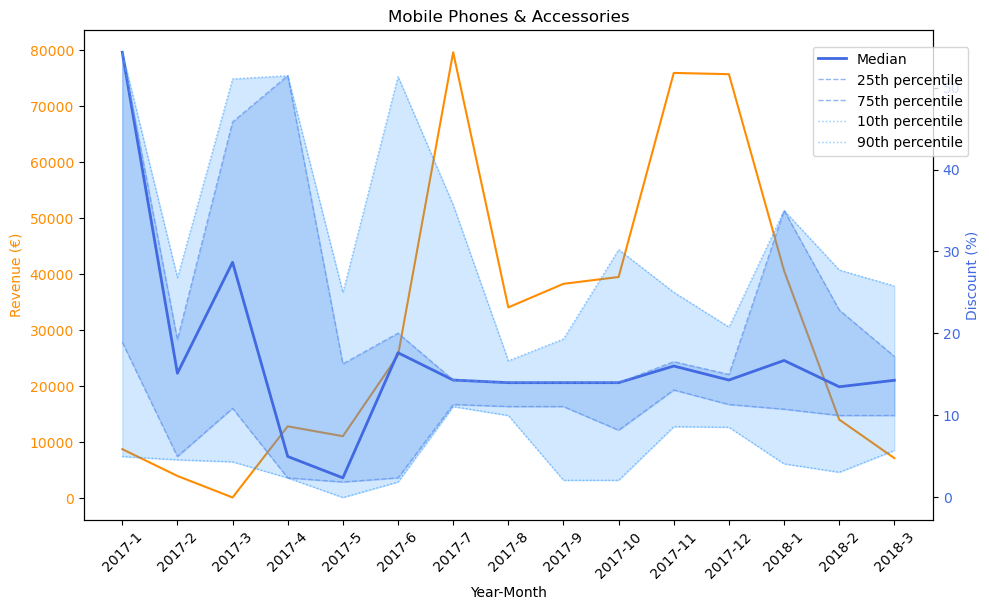

In [123]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Mobile Phones & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Mobile Phones & Accessories')
plt.show();

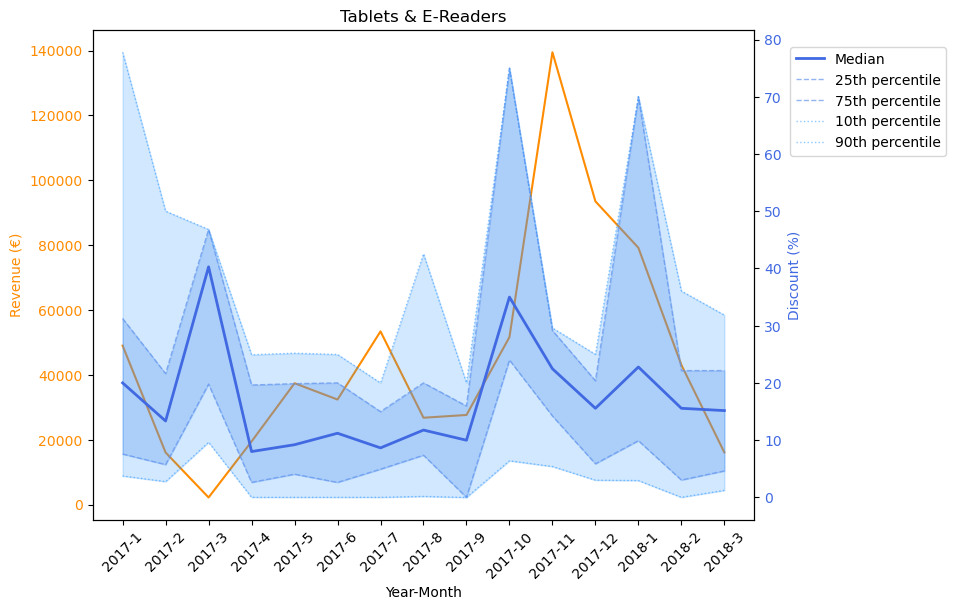

In [124]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Tablets & E-Readers', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.3, 0.98))

fig.tight_layout()
plt.title('Tablets & E-Readers')
plt.show();

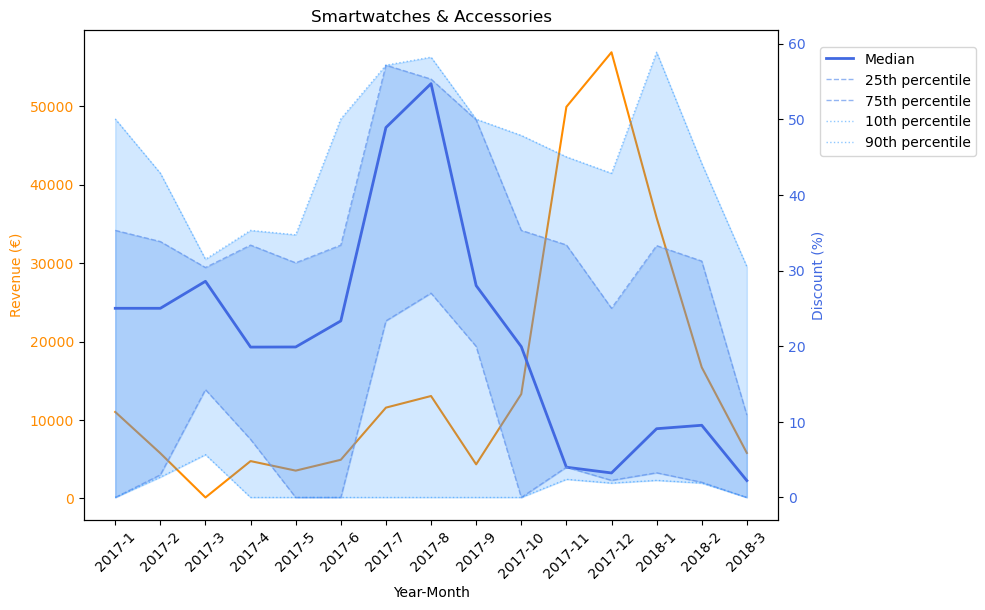

In [126]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Smartwatches & Accessories', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Smartwatches & Accessories')
plt.show();

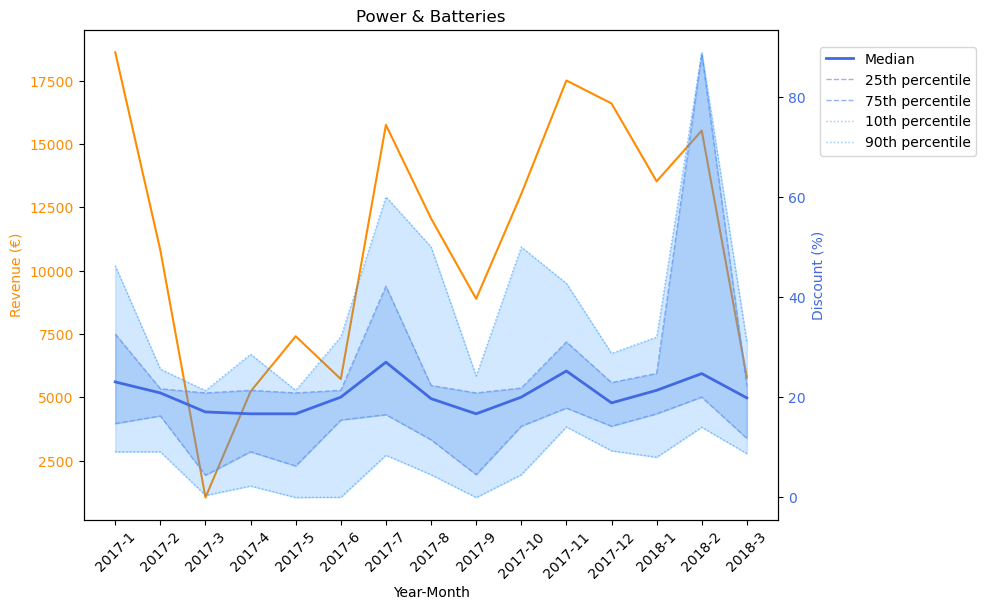

In [127]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Power & Batteries', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Power & Batteries')
plt.show();

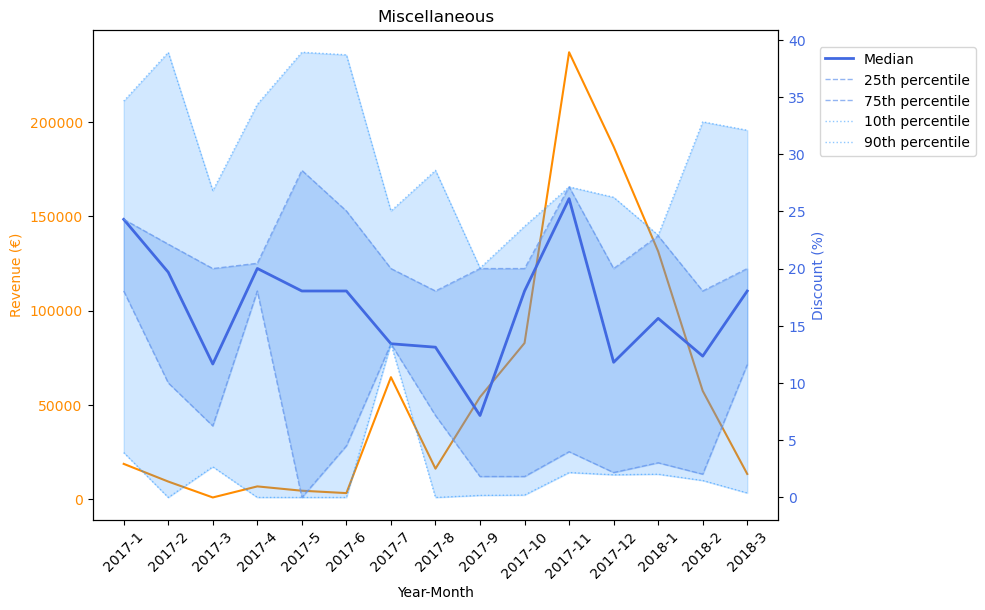

In [129]:
temp_df_alt = ol_xt_df.loc[ol_xt_df['category'] == 'Miscellaneous', :]
temp_df_alt['Year'] = temp_df_alt['date'].dt.year
temp_df_alt['Month'] = temp_df_alt['date'].dt.month

temp_agg_df_alt = temp_df_alt.groupby([
                                        'Year',
                                        'Month',                
            ]).agg({'order_product_price': 'sum', 
                    'discount_pct': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.10), lambda x: x.quantile(0.90)]
                    })

# Flatten column names for easier access
temp_agg_df_alt.columns = ['order_product_price', 'discount_median', 'discount_25th', 'discount_75th', 'discount_10th', 'discount_90th']

# Create x-axis labels
x_labels = temp_agg_df_alt.index.get_level_values(0).astype(str) + '-' + temp_agg_df_alt.index.get_level_values(1).astype(str)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Revenue plot (left y-axis)
color = 'darkorange'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Revenue (€)', color=color)
sns.lineplot(x=x_labels, y='order_product_price', data=temp_agg_df_alt, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Discount plot (right y-axis)
ax2 = ax1.twinx()
color = 'royalblue'
ax2.set_ylabel('Discount (%)', color=color)

# Plot median line
sns.lineplot(x=x_labels, y='discount_median', data=temp_agg_df_alt, ax=ax2, color=color, linewidth=2, label='Median')

# Plot 25th and 75th percentile lines with lighter color
light_royal = 'cornflowerblue'
ultra_light_royal = 'dodgerblue'
sns.lineplot(x=x_labels, y='discount_25th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='25th percentile')
sns.lineplot(x=x_labels, y='discount_75th', data=temp_agg_df_alt, ax=ax2, color=light_royal, linewidth=1, linestyle='--', alpha=0.7, label='75th percentile')
sns.lineplot(x=x_labels, y='discount_10th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='10th percentile')
sns.lineplot(x=x_labels, y='discount_90th', data=temp_agg_df_alt, ax=ax2, color=ultra_light_royal, linewidth=1, linestyle=':', alpha=0.5, label='90th percentile')

# Fill the area between 25th and 75th percentiles
ax2.fill_between(range(len(x_labels)), 
                 temp_agg_df_alt['discount_25th'], 
                 temp_agg_df_alt['discount_75th'], 
                 color=light_royal, alpha=0.3)
ax2.fill_between(range(len(x_labels)),
                 temp_agg_df_alt['discount_10th'], 
                 temp_agg_df_alt['discount_90th'], 
                 color=ultra_light_royal, alpha=0.2)

ax2.tick_params(axis='y', labelcolor=color)

# Add legend for discount percentiles
ax2.legend(loc='best', bbox_to_anchor=(1.05, 0.98))

fig.tight_layout()
plt.title('Miscellaneous')
plt.show();